# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [ ]:
NAME = "León Correa Ramírez"
Student_number = "e122676"

---

# ICAT3190, Exercise 1

## Task 1

Implement a function which calculates the Root Mean Square value of the input vector, according to the following formula:

$$x_{rms}=\sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2} $$'

Name your function as `myRMS`. It should take one input vector (x) as input and it returns single RMS value as output. Code your function in the cell below. When you think it is ready, execute it by pressing `Shift-Enter`. Then you can run the test cases in the next cell by hitting `Shift-Enter` again.

- Remember to import necessary libraries, like numpy.
- You may assume that the input vector is a numpy array, for example `x=np.array([1,2,3,4,5])`, or `x=np.linspace(0,1,500)`.
- The power operator in python is `**`, while in many other programming languages it is `^`

Read basics about python programming from [Dive into Python](https://diveinto.org/python3/table-of-contents.html) and use the documentation of [Numpy](https://numpy.org/).

Check also the execution time of your program.

**TIP**
You may use the following template for your function:

```
def myRMS(x):
    ...
```

In [78]:
%matplotlib inline

from numpy import sqrt, square, mean
import numpy as np

# YOUR CODE HERE
#Get the squared mean value by using the numpy functions sqrt, mean, square
def myRMS(x):
  return np.sqrt(np.mean(np.square(x)))
  raise NotImplementedError()

In [79]:
### Tests for your code, Do not change!
### There can be also additional hidden tests.
### -----------------------------------
from scipy.linalg import norm
import numpy as np
import sklearn

from sklearn.metrics import mean_squared_error

# Make a function for calculating rms using norm
trueRMS = lambda x: sqrt(mean_squared_error(x,x*0))

x1=np.array([2,2,2,2,2])
assert(myRMS(x1)==2)

x2=np.array([3,4,5.2,8,-2,0,1.2])
assert(myRMS(x2)==trueRMS(x2))


# Time it
x4=np.random.normal(5,2,size=1000000)
%time myRMS(x4)


CPU times: user 2.61 ms, sys: 0 ns, total: 2.61 ms
Wall time: 2.63 ms


5.3831451889675295

## Task 2

Create a polynomial signal, $y$, and add some normal noise $\mathcal{N}(\mu, \sigma)$ into it, where, $\mu$, is the mean value of the noise and, $\sigma$, is the standard deviation. Calculate the values of the signal in 100 points between $x \in [0, 3]$. Create the signal according to the following formula:

$$y=0.1 x^2 + 1.5 x + \mathcal{N}(0,0.5) $$

Then make a scatter plot of the $y$ against $x$. You can use the standard plot function, but do not use a line plot but plot only dots for all values using syntax `plt.plot(x,y,'*')`. Remember to import `plt` module from `matplotlib.pyplot as plt`.

See how normal noise was created in the test cell (In [15]) of previous Task, using `np.random.normal()`. Use `np.linspace()` function to create a linear x-axis as was also shown in lecture notes.

See examples from [MatplotLib tutorials](https://matplotlib.org/3.1.1/tutorials/index.html).

Text(0.5, 0, 'X')

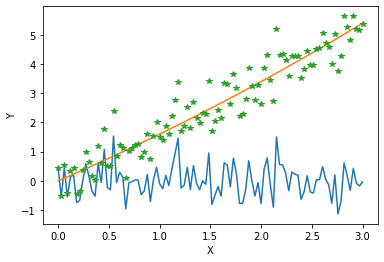

In [81]:
# YOUR CODE HERE
# Here a normal noise function is created with MV = 0, SD = 0.5 and Size=100
noise = np.random.normal(0,0.5,100)
#The 100 points to evaluate belong to the range x e [0,3]
x = np.linspace(0,3,100)
#Creation of the polynomial signal without noise
yfilt = (0.1*(x**2))+(1.5*x)
#Creation of the polynomial signal with noise
y = (0.1*(x**2))+(1.5*x)+noise
#Different plots to see the effects of noise in the polynomial signal
import matplotlib.pyplot as plt
plt.plot(x,noise)
plt.plot(x,yfilt)
plt.plot(x,y,'*')
plt.ylabel('Y')
plt.xlabel('X')
#raise NotImplementedError()

Text(0.5, 0, 'X')

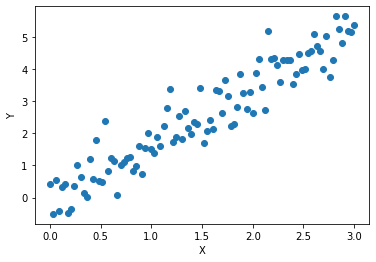

In [82]:
# Look visually, if the result looks like it should

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.ylabel('Y')
plt.xlabel('X')

In [83]:
### Some tests for your code.
### -----------------------------------
assert(len(x)==100)
assert((y.mean()>2.4) and (y.mean()<2.7))
assert((y.min()>-1.5) and (y.max()<7))
assert((y.std()>1.2) and (y.std()<2))

## Task 3

Make a function, which optimize a one dimensional linear model, by finding and optimal value for coefficient $k$ so that the error $E$ given by the following formula is minimized:

$$ E = \sum_{i=1}^N (y - k\cdot x)^2 $$

You may use 
 1. brute force solution and try suitable values for $k$ in a loop.
 1. or use the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) model from sklearn package

Either way, define a function which takes $x$ and $y$ as input and returns a tuple containing both the coefficient $k$ and the RMS error $E$ of the model. 
   
- Does the model fit into the data? 
- The model is linear, so it tries to fit a line into the data, what is the slope of the fitted line?

**TIP**
If you use LinearRegression, remember to traspose $x$ into column vector for example in the following way: ```x=xoriginal.reshape(-1,1)```


**TIP 2**
You may use the following template for your function
```
def linreg(x,y):
    k=0.5
    E=0.0
    return (k,E) 
```


In [84]:
from sklearn.linear_model import LinearRegression
import math

# YOUR CODE HERE
def linreg(x,y):
    #Shaping the data to train the model
    Xtrain = x.reshape(-1,1)
    Ytrain = y.reshape(-1,1)
    
    #Model instantiation
    model = LinearRegression()

    #Training the model
    model.fit(Xtrain, Ytrain)

    #Predicting the Y values with the train data
    Ypredicted = model.predict(Xtrain)

    #Model metrics
    model.score(Xtrain, Ytrain)
    MSE = np.square(np.subtract(Ytrain,Ypredicted)).mean()
    RMSE = math.sqrt(MSE)
    k = model.coef_
    E = RMSE
    print("Model Slope:",k)
    print("Model Intercept:",model.intercept_)
    print("Model Score:", model.score(Xtrain, Ytrain))
    print("RMSE:",RMSE)
    print("k,E \n",k,E)

    # Plot outputs
    plt.scatter(Xtrain, Ytrain,  color='black')
    plt.plot(Xtrain, Ypredicted, color='red')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()

    return (k,E)
    #raise NotImplementedError()

Model Slope: [[1.77050807]]
Model Intercept: [-0.09705641]
Model Score: 0.8951772413302496
RMSE: 0.5299622163435458
k,E 
 [[1.77050807]] 0.5299622163435458


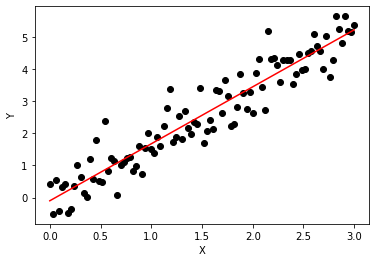

Seems working


In [85]:
k,E=linreg(x,y)
assert(abs(k-1.69)<0.2)
print ("Seems working")



## Analyze the results
1. Does the model fit into the data well? 
1. The model is linear, so it tries to fit a line into the data, what is the slope of the fitted line?
1. Mention two reasons why the model does not fit better?

1. The model seems overfitted
2. The slope of the model corresponds to the coeficient k calculated as LinerRegression().coef_
3. The training data has noise and the number of samples might be too low

The end :)